# Data Wrangling: Insight Report on the WeRateDog Twitter Data Analysis project.
In the data wrangling process data cleaning/remediation, or data munging which refers to a variety of processes designed to transform raw data into more readily used formats. Since data can be represented in various formats and the role of data wrangling is also merging, grouping, concatenating and getting ready for analyzing or building models on the given datasets. To do this Python built-in features has been applied. In this data wrangling process basically, data gathering, data Assessing and data cleaning are performed. 

Most importantly, if data lacks clartiy and simlicity to understood, finding the correct insight would be difficult.  


### The following library are imported to perform the whole analysis 

In [1]:
import requests
import tweepy
import re
import json
import pandas as pd
from textblob import TextBlob
import zipfile
from tweepy import OAuthHandler
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import nltk
import seaborn as sns

#### Loading the master file to data frame 

In [3]:
df_master = pd.read_csv('datasets/twitter_archive_master.csv')

### Accordingly, the insight and visualization of the data analysis are presented below 
#### Q1. what do look like the distribution of the rating_numerator on the given dataset?

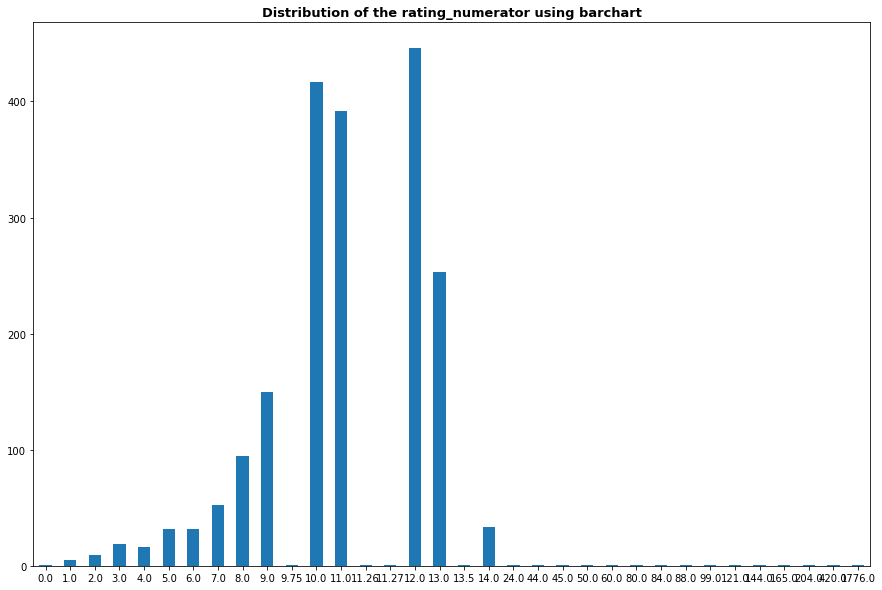

In [4]:
df_master['rating_numerator'].value_counts().sort_index().plot(kind = 'bar', figsize = (15,10), rot = 0); # sorting and ploting
plt.title("Distribution of the rating_numerator using barchart", fontsize = 13, fontweight = 'bold');

Insight
> The insight from this question is, most of the rating numerator values lays between 1 up to 14. Most importantly, the rating numerator value with 12 are mostly tweeted in the given twitter datasets.
> this also tells us some filtering mechanism on the value of the rating numerator would be necessary to make more feasible for further analysis.


#### Q2. How does look like the association among the rating_numerator, favorite_count and retweet_count?

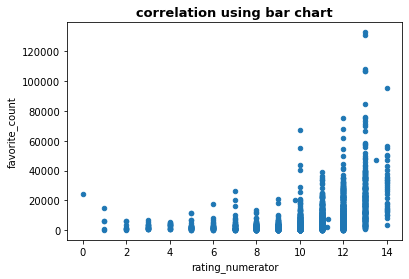

In [5]:
df_filtered_master = df_master[df_master['rating_numerator'] <= 15]
df_filtered_master.plot(x='rating_numerator', y='favorite_count',kind='scatter')
plt.title("correlation using bar chart", fontsize = 13, fontweight = 'bold');

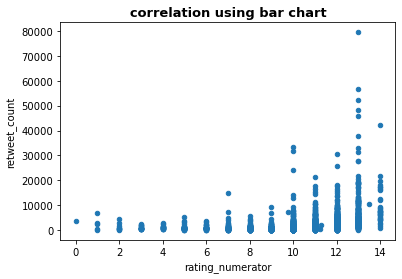

In [6]:
# ploting using scatter plot
df_filtered_master.plot(x='rating_numerator', y='retweet_count',kind='scatter')
plt.title("correlation using bar chart", fontsize = 13, fontweight = 'bold');

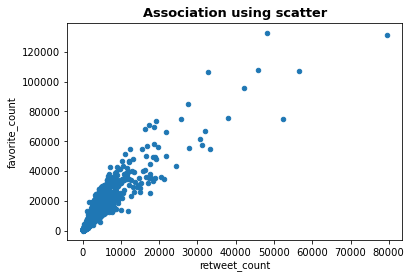

In [8]:
# ploting using line plot
df_filtered_master.plot(x='retweet_count', y='favorite_count',kind='scatter')
plt.title("Association using scatter", fontsize = 13, fontweight = 'bold');

#### or using correlation

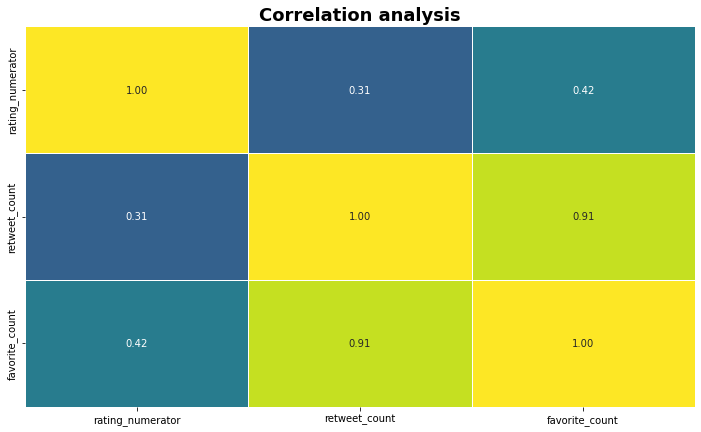

In [11]:
# calculeting correlation
plot_heatmap(correlation, 'Correlation analysis')

Insight 
> From the above plots, it can be understood that, the correlation among the three variable is relatively positive. most importantly any dog bread type that has been favorited is most likely retweeted. on the other hand as the rating numerator increase it would be likely favorited. ranting umerator has week associaeion with retweet count.

#### Q3. How does the rating_numerator has an impact on dog_satge 

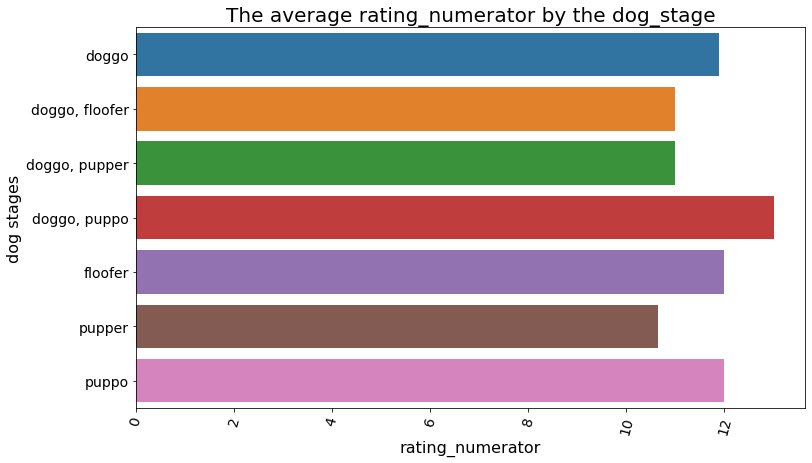

In [15]:
plot_bar(dog_st, dog_avg.values, dog_avg.index, "The average rating_numerator by the dog_stage", 
              "rating_numerator", "dog stages")

Insight 
> The dog stages are visualized with the average rating numerator on the given tweet data. Here the puppo, doggo stage is rated more among the other dog stages and its rating numerator is valued as 13/10. So rating numerator with 13 results which dog stage is mostly tweeted. the pupper is the most Underrated in the given dog satges 

#### Q4. Do the predicted dog breed with higher rating_numenator receive better favorite_count?

In [16]:
# df_nrating_favo means dataframe for rating_numerator and favorite count
#df_nrating_favo = df_master[df_master[['tweet_id', 'rating_numerator','favorite_count', 'first_prediction', 'second_prediction', 'third_prediction' ]].isnull() == False]

In [18]:
# function
def myPlot(df, grpVar, yVar, color = ('purple', 'blue')):
    # df: is the data frame pass from the callee
    # grpVar: is the variable that represent the graph on the x axis
    
    # yvar: the varible that shows its value on the y axis
    # 2. plot, using the groupby with the mean value, it plots on the x axis which is important feature of groupby 
    df.groupby(grpVar)[yVar].mean().plot.bar(edgecolor ='black', figsize =[15,8], rot = 0, width = 0.8, color = color);
    grpVar = grpVar.replace("_", " ") # replacing the _ with space
    yVar = yVar.replace("_ ", " ")  # replacing the _ with space
    # 3. Add title and format
    plt.title(f'Average {yVar} by {grpVar}'.title(), fontsize = 14, weight = 'bold')
    # 4. Adding x lable
    plt.xlabel(grpVar.title(), fontsize = 10, weight = 'bold')
    # 5 Add y label
    plt.ylabel(f'Average {yVar}'.title(), fontsize = 10, weight = 'bold')

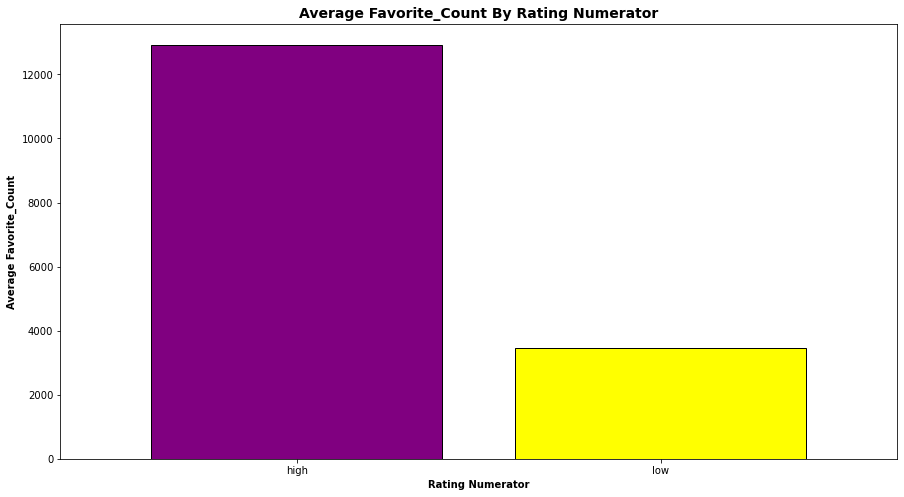

In [19]:
df_nrating_favo['rating numerator'] = 'high'
# 2. change the rows below median to low
df_nrating_favo.loc[df_nrating_favo['rating_numerator'] < df_nrating_favo['rating_numerator'].median(), 'rating numerator'] = 'low'
# call the plot fumction
myPlot(df_nrating_favo, 'rating numerator', 'favorite_count', color = ('purple', 'yellow'))

Insight 
> Yes, the predicted dog breed with rating numerator values beyond the median are most likely got highly favorited. 

#### Q5. Dog breeds that has maximum and minimum fovorite count in each prediction 

In [20]:
# finding maximum and minimum
favo_max= df_master['favorite_count'].max()
favo_min = df_master['favorite_count'].min()

In [23]:
df_max_favo =df_master.query('favorite_count >= {}'.format(favo_max)) 
df_min_favo =df_master.query('favorite_count <= {}'.format(favo_min)) 

In [24]:
# with maximum favorite_count
df_max_favo[['favorite_count','first_prediction','second_prediction', 'third_prediction']]

,favorite_count,first_prediction,second_prediction,third_prediction
306,132810,Lakeland_terrier,Labrador_retriever,Irish_terrier


In [25]:
# with minimum favorite_count
df_min_favo[['favorite_count','first_prediction','second_prediction', 'third_prediction']] 

,favorite_count,first_prediction,second_prediction,third_prediction
1954,81,English_setter,Newfoundland,Borzoi


the insight
>The breeds predicted by the three-prediction algorithm has retweet count 132810 and the name of the breeds are:
>-	Lakeland_terrier, by the first prediction model
>-	Labrador_retriever, by the second prediction model
>-	Irish_terrier, by the third predition model

>On the other hand, the dog breed with minimum favorite count (=81) are: 
>-	English_setter, by the first prediction model
>-	Newfoundland, by the second prediction model
>-	Borzoi, by the third predition model 

#### Q6. which dog breeds are among the five most having the highest tweets in each prediction?

In [27]:
# lests choose the non null dog satges
df_master= df_master[df_master['dog_stage'].isnull() == False]
df_prediction = df_master[['first_prediction','second_prediction', 'third_prediction']]

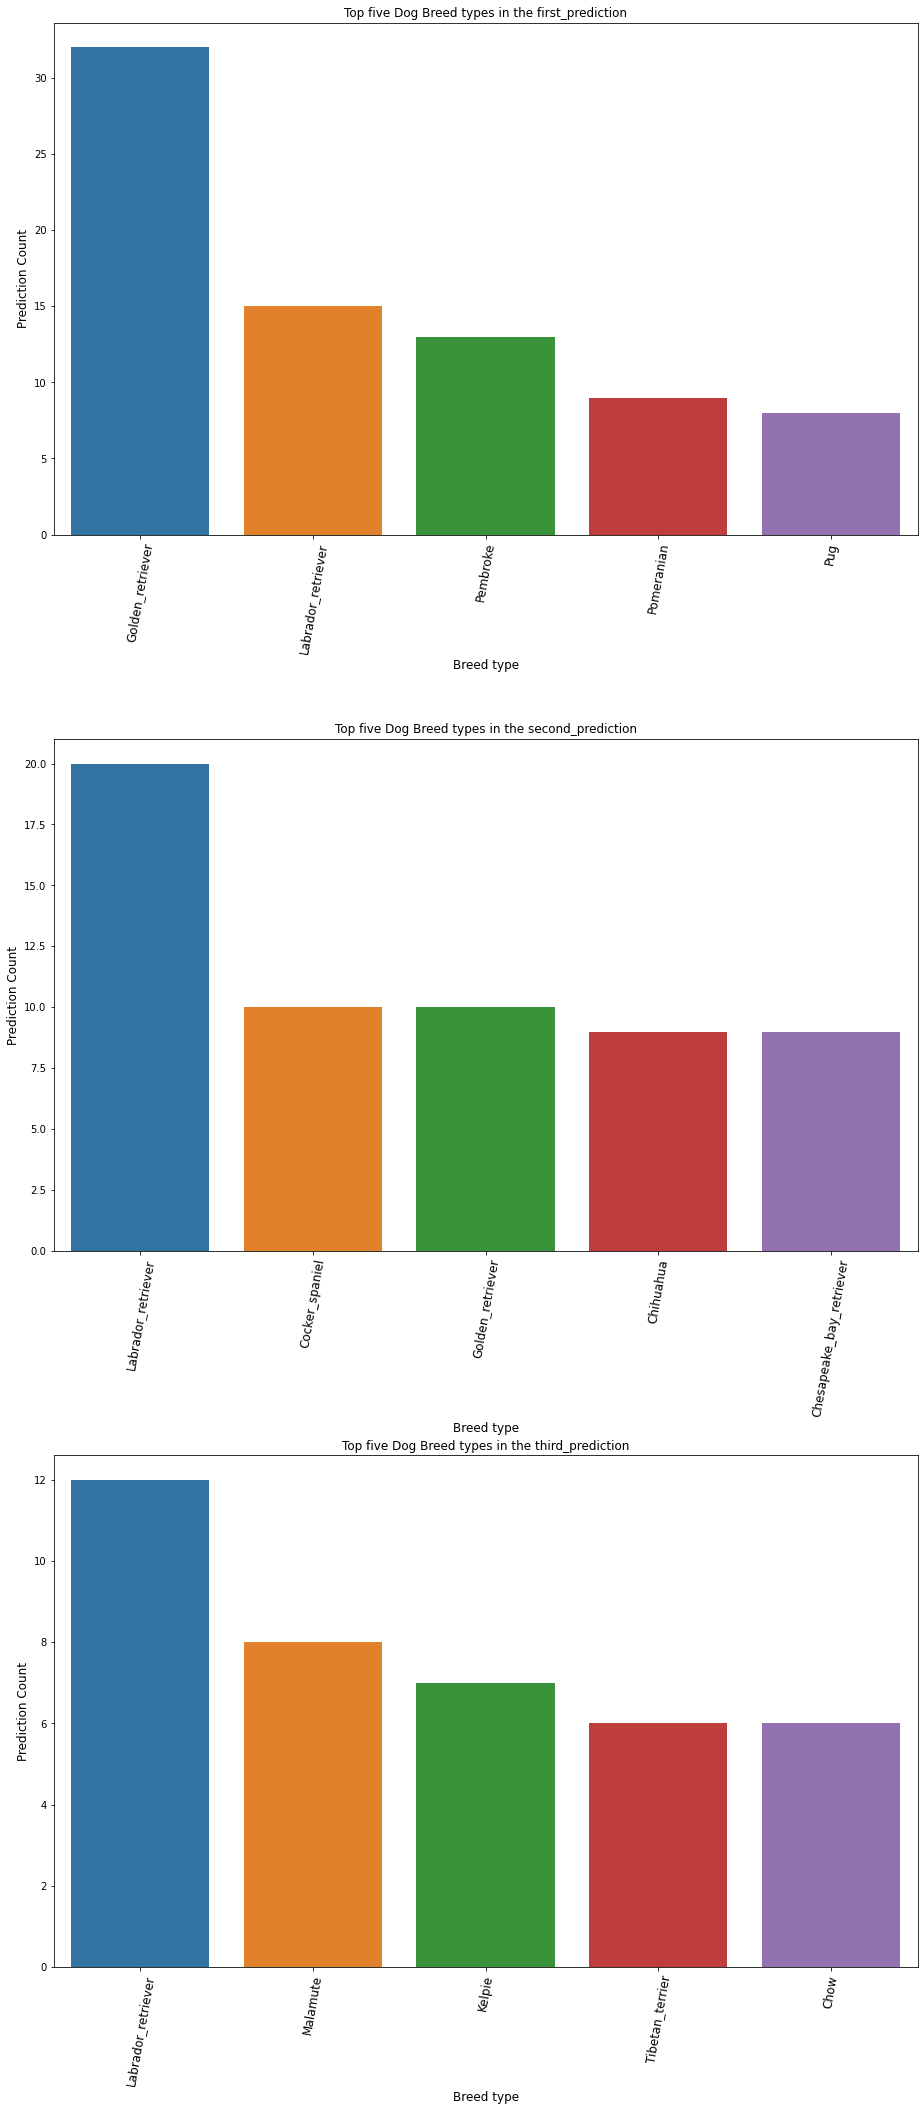

In [28]:
def top_five_predicted(df):
    count=1
    plt.subplots(figsize=(15, 18))
    for pre in df:
        plt.subplot(3,1,count)
        ax = sns.barplot(x = df_master[pre].value_counts()[0:5].index,
            y =df_master[pre].value_counts()[0:5],
            data = df_master);
        ax.set_xticklabels(ax.get_xticklabels(),rotation = 80, fontsize = 12);
        plt.xlabel("Breed type",fontsize = 12);
        plt.ylabel("Prediction Count",fontsize = 12);
        plt.title("Top five Dog Breed types in the "+ pre,fontsize = 12);
        count+=1
        plt.subplots_adjust(left=0.1,
                    bottom=0.0, 
                    right=0.9, 
                    top=1.5, 
                    wspace=0.4, 
                    hspace=0.4)
        #plt.legend(df_master[pre].value_counts()[0:5].index)



top_five_predicted(df_prediction)

Insight
>Here, it is tried to identify the types of breeds with mostly tweeted in each prediction model in the given tweets. Accordingly, golden_retriever from the first prediction, Labrador_retriever from second prediction and the third are highly tweeted and got popularity.

## 7. what are the top 5 breed types in the top 3 rating numerator

In [29]:
def serious_bar(serious, ax):  
    return sns.barplot(x=serious.index, y=serious, ax=ax)

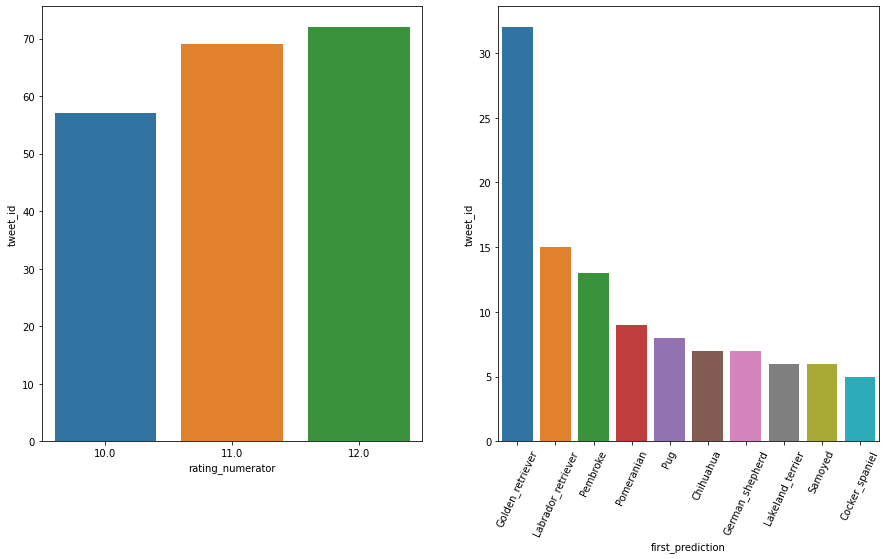

In [30]:
def trys():
    top_10_pre = df_master.groupby("first_prediction")['tweet_id'].nunique().nlargest(10)
    top_3_rating = df_master.groupby("rating_numerator")['tweet_id'].nunique().nlargest(3)

    fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(15,8))
    serious_bar(top_3_rating , ax1)
    
    serious_bar(top_10_pre, ax2)
    plt.xticks(rotation=65)
   # plt.save()
trys()

In [31]:
# identifying top five breeds in the top 3 rating nuerator
top_3_rating = df_master.groupby("rating_numerator")['tweet_id'].nunique().nlargest(3)

In [32]:
# the three rating
rating_11 = df_master.loc[df_master['rating_numerator'] == 11.0, ['first_prediction']].value_counts().nlargest(5)
rating_12 = df_master.loc[df_master['rating_numerator'] == 12.0, ['first_prediction']].value_counts().nlargest(5)
rating_10 = df_master.loc[df_master['rating_numerator'] == 10.0, ['first_prediction']].value_counts().nlargest(5)

In [33]:
rating_11

first_prediction  
Golden_retriever      7
Toy_poodle            4
Labrador_retriever    4
Pomeranian            3
Norwegian_elkhound    2
dtype: int64

In [34]:
rating_12

first_prediction  
Golden_retriever      13
Pembroke               6
Labrador_retriever     5
German_shepherd        4
Eskimo_dog             4
dtype: int64

In [35]:
rating_10

first_prediction  
Pug                   5
Golden_retriever      3
Labrador_retriever    3
Lakeland_terrier      2
Teddy                 2
dtype: int64

Insight
> in the above 3 most rating numerator and 10 most breed types are identified. Accordingly the top five most breed type on the top 3 rating numerator are obtained. So, from rating_10 it is Pug, rating_12 it is Golden_retriever and rating_11 it is Golden_retriever are in the first rank from each 3 most rating.      